In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define the CNN architecture with increased depth and dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model with a lower initial learning rate and learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=100,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()




Epoch 1/100
782/782 [==============================] - 41s 49ms/step - loss: 1.7538 - accuracy: 0.3417 - val_loss: 1.6452 - val_accuracy: 0.4197
Epoch 2/100
782/782 [==============================] - 34s 43ms/step - loss: 1.3845 - accuracy: 0.4959 - val_loss: 1.2139 - val_accuracy: 0.5635
Epoch 3/100
782/782 [==============================] - 34s 43ms/step - loss: 1.2218 - accuracy: 0.5634 - val_loss: 1.0288 - val_accuracy: 0.6297
Epoch 4/100
188/782 [======>.......................] - ETA: 24s - loss: 1.1553 - accuracy: 0.5851

KeyboardInterrupt: 

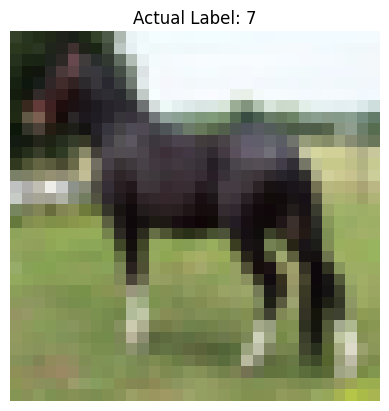

1/1 [==============================] - 0s 31ms/step
Predicted Label: Horse, Confidence: 0.9999998807907104


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate a random index to select a random image from the test dataset
image_index = random.randint(0, len(test_images) - 1)

# Selected the random image and its corresponding label
selected_image = test_images[image_index]
selected_label = np.argmax(test_labels[image_index])

# Display the random image
plt.imshow(selected_image)
plt.axis('off')
plt.title(f'Actual Label: {selected_label}')
plt.show()

# Make a prediction on the selected image
prediction = model.predict(np.expand_dims(selected_image, axis=0))
predicted_label = np.argmax(prediction)
confidence = np.max(prediction)

# Mapping from label indices to class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display the model's prediction with the name of the animal
print(f"Predicted Label: {class_names[predicted_label]}, Confidence: {confidence}")
